In [2]:
from dataclasses import dataclass
import itertools
import logging
import random
import math
import numpy as np
import json
import pickle
import time
import torch
import sys
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
from probe_utils import *

from omegaconf import OmegaConf
from pathlib import Path
from torch import nn, Tensor
from torch.nn import functional as F
from typing import List, Optional, Tuple
import os
# os.chdir("/data/tianyu_guo/birth")
from data import DataArgs, Dataset, iterate_batches, make_dataset
from ihead_full_model import ModelArgs, Transformer, forward_hook, test_value, test_sink, clean_attention

%load_ext autoreload
%autoreload 2


# Test on double tasks explore 1

In [4]:
run_path_server = "/data/tianyu_guo/birth/gens/pre_final/dormant_double_tasks_explore1_new"
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, n_layers=1, n_heads=2, bos_num=1, train_steps=10000, delim=0, mix_p=0.3, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
hook = forward_hook(target_layers=[], target_name="")
predicts, outputs_list = model.modified_forward_with_hook(x, hook)
model.cuda()


Transformer(
  (tok_embeddings): Embedding(67, 256)
  (pos_embeddings): Embedding(256, 256)
  (layers): ModuleList(
    (0): TransformerBlock(
      (attention): Attention(
        (wq): Linear(in_features=256, out_features=256, bias=False)
        (wk): Linear(in_features=256, out_features=256, bias=False)
        (wv): Linear(in_features=256, out_features=256, bias=False)
        (wo): Linear(in_features=256, out_features=256, bias=False)
      )
      (ff): FeedForward(
        (w1): Linear(in_features=256, out_features=1024, bias=False)
        (w2): Linear(in_features=1024, out_features=256, bias=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (output): Linear(in_features=256, out_features=67, bias=False)
)

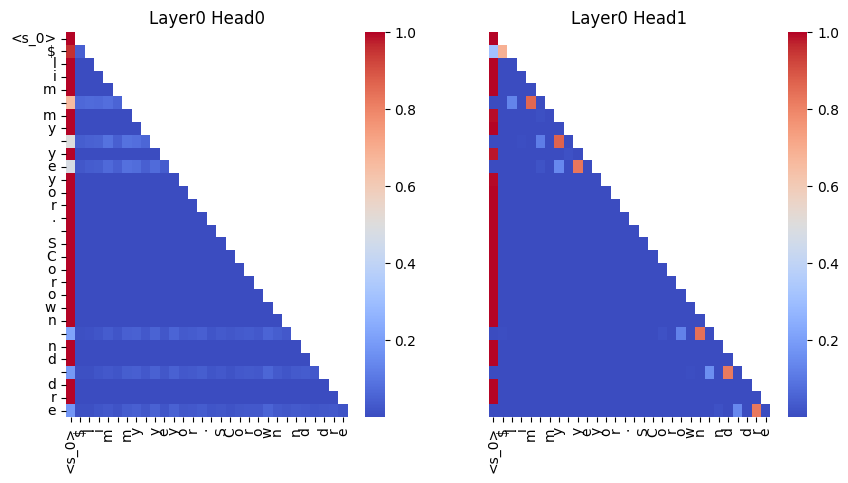

In [9]:
seq_len = 30
seq_idx = 1
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
text = ds.decode(sub_seq)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for head_idx in range(2):
    ax = axes[head_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()

# Test on double tasks explore 2

In [13]:
run_path_server = "/data/tianyu_guo/birth/gens/pre_final/dormant_double_tasks_explore2"
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, n_layers=2, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=None, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
hook = forward_hook(target_layers=[], target_name="")
predicts, outputs_list = model.modified_forward_with_hook(x, hook)
model.cuda()


Transformer(
  (tok_embeddings): Embedding(67, 256)
  (pos_embeddings): Embedding(256, 256)
  (layers): ModuleList(
    (0-1): 2 x TransformerBlock(
      (attention): Attention(
        (wq): Linear(in_features=256, out_features=256, bias=False)
        (wk): Linear(in_features=256, out_features=256, bias=False)
        (wv): Linear(in_features=256, out_features=256, bias=False)
        (wo): Linear(in_features=256, out_features=256, bias=False)
      )
      (ff): FeedForward(
        (w1): Linear(in_features=256, out_features=1024, bias=False)
        (w2): Linear(in_features=1024, out_features=256, bias=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (output): Linear(in_features=256, out_features=67, bias=False)
)

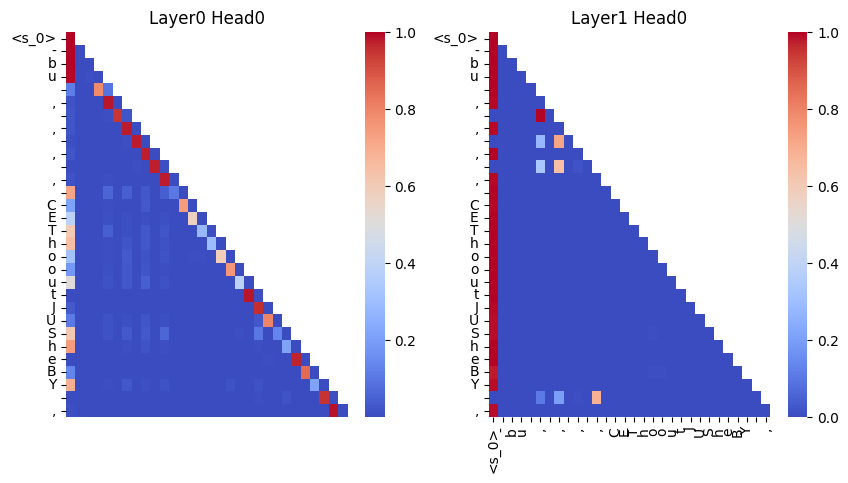

In [16]:
seq_len = 30
seq_idx = 0
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
text = ds.decode(sub_seq)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for layer_idx in range(2):
    ax = axes[layer_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()

# dormant double tasks explore 3

In [9]:
run_path_server = "/data/tianyu_guo/birth/gens/pre_final/dormant_double_tasks_explore3"
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, n_layers=1, n_heads=2, bos_num=2, train_steps=10000, delim=0, mix_p=0.5, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
hook = forward_hook(target_layers=[], target_name="")
predicts, outputs_list = model.modified_forward_with_hook(x, hook)
model.cuda()

Transformer(
  (tok_embeddings): Embedding(68, 256)
  (pos_embeddings): Embedding(256, 256)
  (layers): ModuleList(
    (0): TransformerBlock(
      (attention): Attention(
        (wq): Linear(in_features=256, out_features=256, bias=False)
        (wk): Linear(in_features=256, out_features=256, bias=False)
        (wv): Linear(in_features=256, out_features=256, bias=False)
        (wo): Linear(in_features=256, out_features=256, bias=False)
      )
      (ff): FeedForward(
        (w1): Linear(in_features=256, out_features=1024, bias=False)
        (w2): Linear(in_features=1024, out_features=256, bias=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (output): Linear(in_features=256, out_features=68, bias=False)
)

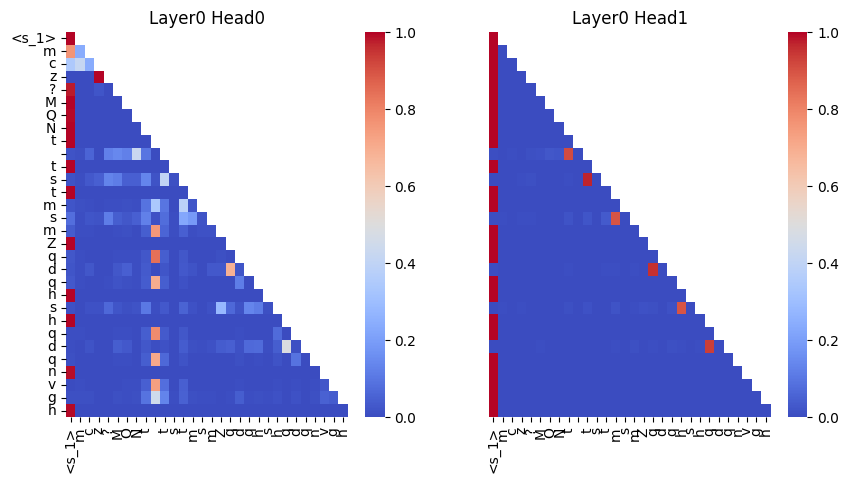

In [10]:
seq_len = 30
seq_idx = 2
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
text = ds.decode(sub_seq)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for head_idx in range(2):
    ax = axes[head_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()

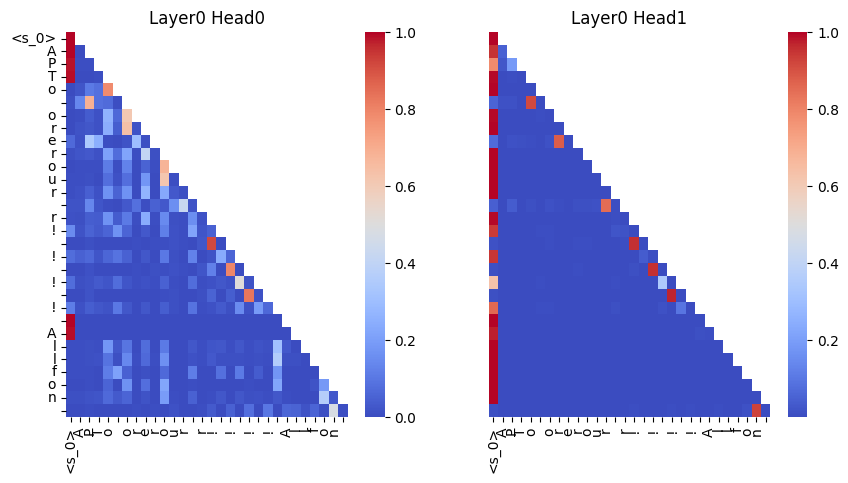

In [11]:
seq_len = 30
seq_idx = 0
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
text = ds.decode(sub_seq)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for head_idx in range(2):
    ax = axes[head_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()

# Dormant Biette

In [4]:
run_path_server = "/data/tianyu_guo/birth/gens/pre_final/dormant_Biette"
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, n_layers=2, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=None, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
hook = forward_hook(target_layers=[], target_name="")
predicts, outputs_list = model.modified_forward_with_hook(x, hook)
model.cuda()

Transformer(
  (tok_embeddings): Embedding(67, 256)
  (pos_embeddings): Embedding(256, 256)
  (layers): ModuleList(
    (0-1): 2 x TransformerBlock(
      (attention): Attention(
        (wq): Linear(in_features=256, out_features=256, bias=False)
        (wk): Linear(in_features=256, out_features=256, bias=False)
        (wv): Linear(in_features=256, out_features=256, bias=False)
        (wo): Linear(in_features=256, out_features=256, bias=False)
      )
      (ff): FeedForward(
        (w1): Linear(in_features=256, out_features=1024, bias=False)
        (w2): Linear(in_features=1024, out_features=256, bias=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (output): Linear(in_features=256, out_features=67, bias=False)
)

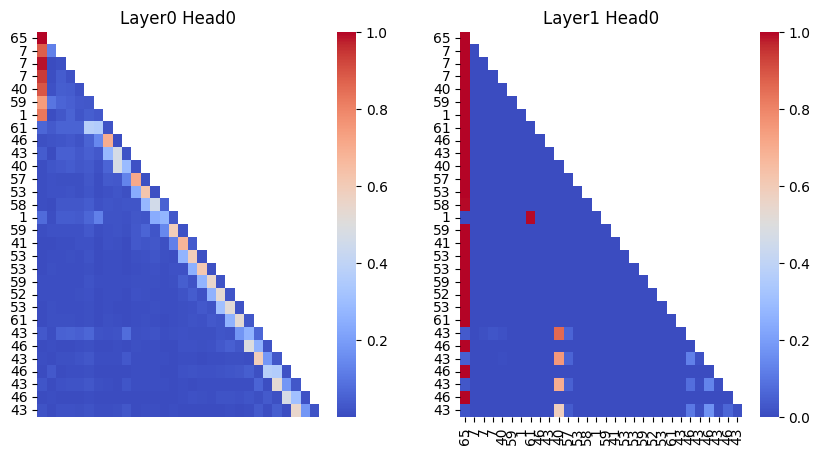

In [6]:
seq_len = 30
seq_idx = 0
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
text = sub_seq
# text = ds.decode(sub_seq)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for layer_idx in range(2):
    ax = axes[layer_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()

# dormant double tasks explore 4

In [13]:
run_path_server = "/data/tianyu_guo/birth/gens/pre_final/dormant_double_tasks_explore4"
# run_path_server2="/data/tianyu_guo/birth/gens/special/dormant_copy_2"
model, cfg, x, y, ds = load_model(run_path_local="/Users/guotianyu/GitHub/birth/gens/special/markov", run_path_server=run_path_server, n_layers=2, n_heads=1, bos_num=1, train_steps=10000, delim=0, mix_p=None, with_data=True, data_path_local="/Users/guotianyu/GitHub/birth/data", data_path_server="/data/tianyu_guo/birth/data")
hook = forward_hook(target_layers=[], target_name="")
predicts, outputs_list = model.modified_forward_with_hook(x, hook)
model.cuda()


Transformer(
  (tok_embeddings): Embedding(67, 256)
  (pos_embeddings): Embedding(256, 256)
  (layers): ModuleList(
    (0-1): 2 x TransformerBlock(
      (attention): Attention(
        (wq): Linear(in_features=256, out_features=256, bias=False)
        (wk): Linear(in_features=256, out_features=256, bias=False)
        (wv): Linear(in_features=256, out_features=256, bias=False)
        (wo): Linear(in_features=256, out_features=256, bias=False)
      )
      (ff): FeedForward(
        (w1): Linear(in_features=256, out_features=1024, bias=False)
        (w2): Linear(in_features=1024, out_features=256, bias=False)
      )
      (attention_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ff_norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (norm): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
  (output): Linear(in_features=256, out_features=67, bias=False)
)

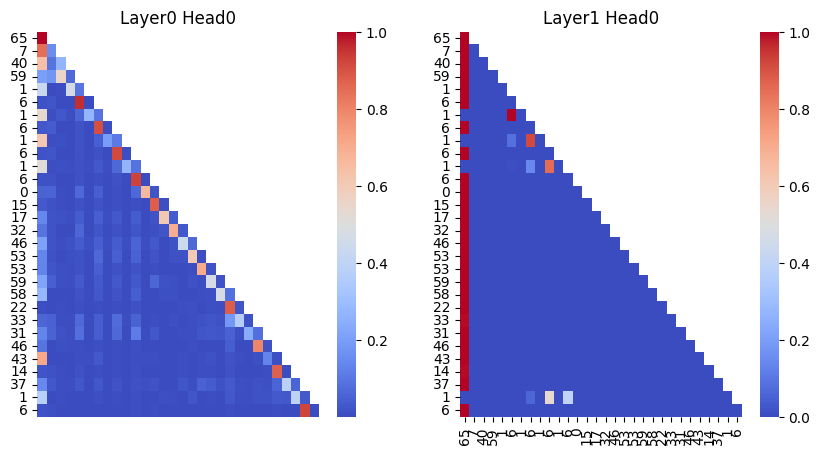

In [15]:
seq_len = 30
seq_idx = 0
layer_idx = 0
head_idx = 0
sub_seq = x.detach().cpu()[seq_idx, :seq_len].numpy().copy()
# text = ds.decode(sub_seq)
text = sub_seq
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()
for layer_idx in range(2):
    ax = axes[layer_idx]
    plot_attns(cfg, ax, seq_idx, head_idx, layer_idx, seq_len, outputs_list, text)
plt.show()